# Measures of center

## Mean and median

In this chapter, you'll be working with the [2018 Food Carbon Footprint Index](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018) from nu3. The `food_consumption` dataset contains information about the kilograms of food consumed per person per year in each country in each food category (`consumption`) as well as information about the carbon footprint of that food category (`co2_emissions`) measured in kilograms of carbon dioxide, or CO², per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your `pandas` and `numpy` skills.

`pandas` is imported as `pd` for you and `food_consumption` is pre-loaded.

### init

In [1]:
import pandas as pd


In [8]:
###################
##### Dataframe
###################

#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(food_consumption)
"""

tobedownloaded="""
{pandas.core.frame.DataFrame: {'food_consumption.csv': 'https://file.io/ZTSaN4ceMIst'}}
"""
prefixToc='1.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="")

#initialisation

import pandas as pd
food_consumption = pd.read_csv(prefix+'food_consumption.csv',index_col=0)

Téléchargements déjà effectués - SKIP


### code

In [10]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption.country=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption.country=='USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption.consumption))
print(np.median(be_consumption.consumption))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption.consumption))
print(np.median(usa_consumption.consumption))


42.13272727272727
12.59
44.650000000000006
14.58


In [11]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption.country == 'Belgium') | (food_consumption.country == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


## Mean vs. median

In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

pandas is loaded as pd, numpy is loaded as np, and food_consumption is available.

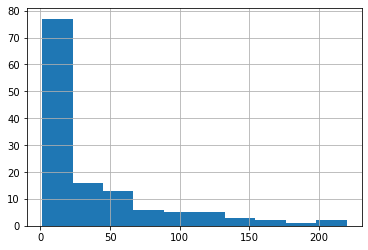

In [12]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption.food_category == 'rice']

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

In [13]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


# Measures of spread 

## Quartiles, quantiles, and quintiles

Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

Both pandas as pd and numpy as np are loaded and `food_consumption` is available.

In [14]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [15]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [16]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


## Variance and standard deviation

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both pandas as pd and numpy as np are loaded, and `food_consumption` is available.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


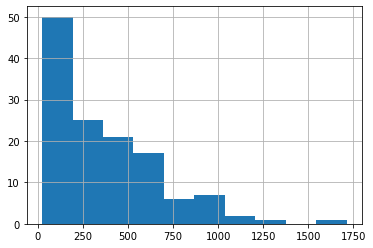

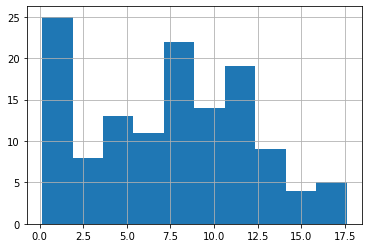

In [17]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption.food_category == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption.food_category == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

## Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>Q1</mtext>
  <mo>&#x2212;</mo>
  <mn>1.5</mn>
  <mo>&#xD7;</mo>
  <mtext>IQR</mtext>
</math>
or greater than <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mtext>Q3</mtext>
  <mo>+</mo>
  <mn>1.5</mn>
  <mo>&#xD7;</mo>
  <mtext>IQR</mtext>
</math>

, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

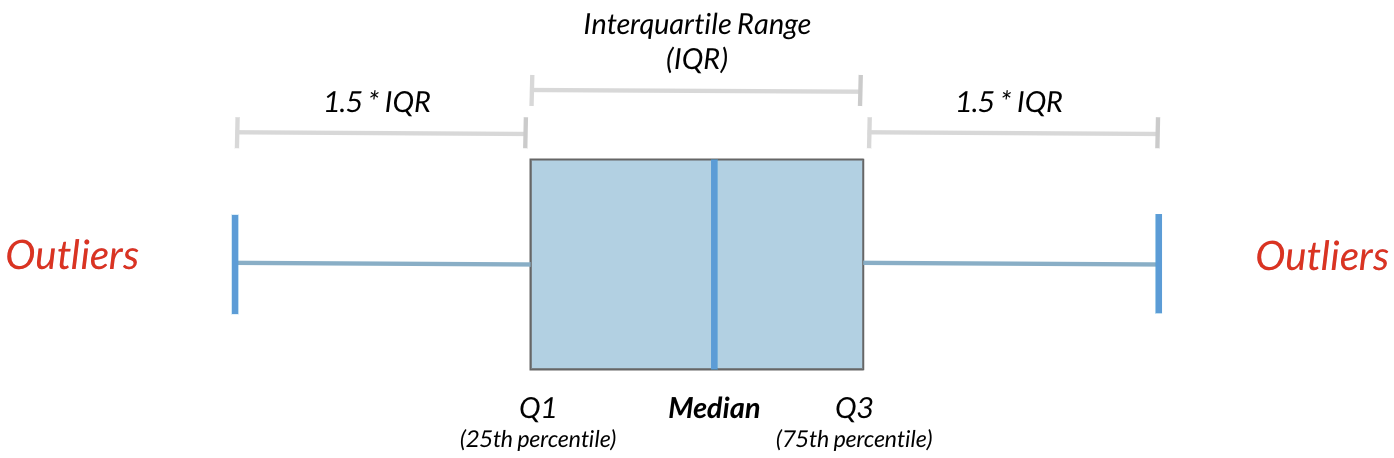
Diagram of a box plot showing median, quartiles, and outliers

In this exercise, you'll calculate IQR and use it to find some outliers. pandas as pd and numpy as np are loaded and `food_consumption` is available.

In [18]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg('sum')

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [19]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3-q1

In [20]:

# Calculate the lower and upper cutoffs for outliers
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [21]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country.values > upper) | (emissions_by_country.values < lower)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
